In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [31]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Exploratory Data Analysis

In [34]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age
[19 18 28 33 32]
47

sex
['female' 'male']
2

bmi
[27.9   33.77  33.    22.705 28.88 ]
548

children
[0 1 3 2 5]
6

smoker
['yes' 'no']
2

region
['southwest' 'southeast' 'northwest' 'northeast']
4

charges
[16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]
1337



In [35]:
df['sex']= df['sex'].map({'female':0, 'male':1 })
df['smoker']= df['smoker'].map({'yes':1, 'no':0})
df['region']=df['region'].map({'southwest':0,'southeast':1, 'northwest':2, 'northeast':3}) 

In [36]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


<AxesSubplot:xlabel='charges', ylabel='Count'>

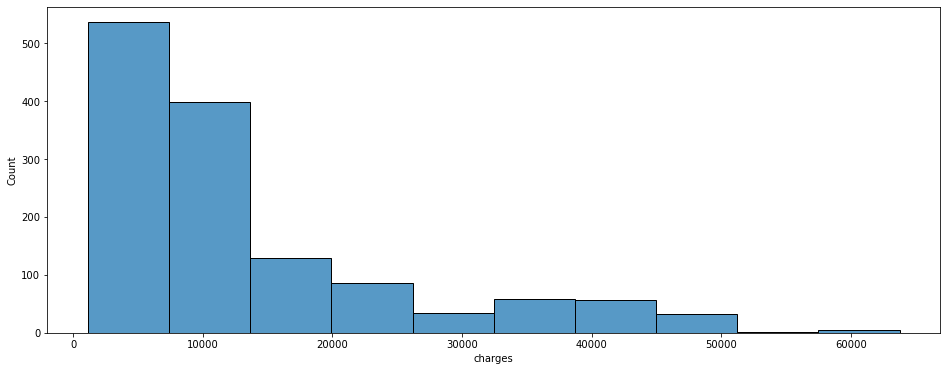

In [37]:
fig= plt.figure(figsize=(16,6))
sns.histplot(df['charges'], bins=10)

In [38]:
print(f"The min charges is {df['charges'].min()}")
print(f"The max charges is {df['charges'].max()}")


The min charges is 1121.8739
The max charges is 63770.42801


In [39]:
print(f"The min age is {df['age'].min()}")
print(f"The max age is {df['age'].max()}")
print(f"The avg age is {df['age'].mean()}")

The min age is 18
The max age is 64
The avg age is 39.20702541106129


# Setting up the frame work

In [40]:
df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state= 1)
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state= 1 )

In [69]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state= 1)
#df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state=1)

In [71]:
len(df_train), len(df_test)

(1070, 268)

In [72]:
df_train

,age,sex,bmi,children,smoker,region,charges
216,53,0,26.600,0,0,2,10355.64100
731,53,1,21.400,1,0,0,10065.41300
866,18,1,37.290,0,0,1,1141.44510
202,60,0,24.035,0,0,2,13012.20865
820,45,1,33.700,1,0,0,7445.91800
...,...,...,...,...,...,...,...
715,60,1,28.900,0,0,0,12146.97100
905,26,0,29.355,2,0,3,4564.19145
1096,51,0,34.960,2,1,3,44641.19740
235,40,0,22.220,2,1,1,19444.26580


In [74]:
X_train = df_train.reset_index(drop = True).copy()
X_test = df_test.reset_index(drop= True).copy()
#X_val = df_val.reset_index(drop=True).copy()

In [75]:
y_train = np.log1p(df_train.charges.values)
#y_val = np.log1p(df_val.charges.values)
y_test = np.log1p(df_test.charges.values)

In [76]:
del df_train['charges']
#del df_val['charges']
del df_test['charges']

In [57]:
y_train

array([ 9.53834464, 10.08449087,  9.46728932,  8.71907135,  8.95258648,
        8.87550434,  8.69793411,  8.15561137,  8.41622883, 10.49677846,
        8.74564025,  7.39195929,  8.2705576 ,  7.12549224,  9.93456382,
        9.56692747,  8.25810097,  9.28802698,  9.39167546, 10.4954456 ,
       10.79724911,  9.33168233,  9.37952958,  7.02364666,  9.43318715,
        8.37133721,  9.07500498,  9.44329005,  8.64724387,  8.29565398,
        9.23702709, 10.08833426, 10.56390491,  7.4508663 ,  9.79286472,
        7.13362072,  8.47232182,  8.99475309,  8.23154148,  7.44420523,
        7.55347445,  9.96861247,  9.47134569, 10.24360788,  9.50237986,
        9.35321682,  8.46633559, 10.18369541,  9.02443669,  9.39518264,
        8.90233885,  9.31321976,  9.39543525, 10.25687783, 10.58970443,
        8.55844623,  9.15015715, 10.58982696,  8.88513451, 10.07778704,
        8.17616744,  9.26892857, 10.6481038 ,  8.81696328,  8.80290264,
        7.39881345, 10.31452438, 10.16661885,  8.65000309,  9.48

# Linear reg

In [77]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred= lin.predict(X_test)

In [79]:
new_df = pd.DataFrame({'actual': y_test, 'lin': y_pred})

In [80]:
new_df

,actual,lin
0,7.406972,7.878604
1,9.337345,9.198255
2,9.082461,8.846290
3,9.247875,9.230102
4,7.651634,8.027036
...,...,...
263,10.599254,10.723771
264,10.668594,10.947006
265,10.696563,11.121002
266,7.667571,7.974831


# Model Eval

In [81]:
from sklearn import metrics

In [85]:
score = metrics.r2_score(y_test, y_pred)
score.round(2)

0.89

In [90]:
from sklearn.metrics import mean_squared_error
Mse_score = mean_squared_error(y_test, y_pred).round(2)
print(f"MSE score is {Mse_score}")

MSE score is 0.1
